# <center> LESSON 9: CASE STUDY with CREDIT SCORING </center>

BASEL I, II, III, IV --> rules  
* Datasource which we have alot of data at: https://www.kaggle.com/
* We can learn and have some test at Kaggle 
* In Kaggle which we have train and test separately instead of we have to show them different as iris before 

## 1. PROBLEM

Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

- **Input**: Historical data of 250,000 borrowers.
- **Output**: SeriousDlqin2yrs.
- **Goal**: Build a model that borrowers can use to help make the best financial decisions.

Reference: [Kaggle Dataset](https://www.kaggle.com/c/GiveMeSomeCredit)

## 2. Exploratory Data Analysis (EDA)

### 2.1 Variables descriptions

|Variables|Descriptions|
|-|-|
|**SeriousDlqin2yrs**| Person experienced 90 days past due delinquency or worse|
|**RevolvingUtilizationOfUnsecuredLines**| Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits|
|**age**| Age of borrower in years|
|**NumberOfTime30-59DaysPastDueNotWorse**| Number of times borrower has been 30-59 days past due but no worse in the last 2 years||
|**DebtRatio**| Monthly debt payments, alimony,living costs divided by monthy gross income
|**MonthlyIncome**| Monthly income|
|**NumberOfOpenCreditLinesAndLoans**| Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)|
|**NumberOfTimes90DaysLate**| Number of times borrower has been 90 days or more past due|
|**NumberRealEstateLoansOrLines**| Number of mortgage and real estate loans including home equity lines of credit|
|**NumberOfTime60-89DaysPastDueNotWorse**| Number of times borrower has been 60-89 days past due but no worse in the last 2 years|
|**NumberOfDependents**| Number of dependents in family excluding themselves (spouse, children etc.)|

* SeriousDlqin2yrs Serious in 2 years

### 2.2 Statistics

Database: SQL and Oracle 

BigData: We will use datawarehouse or DataLake (Spark Hadoop) 

    - RAW DATA->ETL(Extract Transform Load)->Clean Data 
    - Clean Data -> EDA(Exporylory Data Analystis)->Vizulization(matplotlib seaborn, pandas) and Statistic(pandas) --> Feature Engineering (Process the missing value) 
In the realtime: Featureengineering: Selection - > Build the model 

Next Step - > Train model 
Validate model in test data 
If good:
    Do it and test move it to deploy (historgram, index,....precession)
else:
    Check again the EDA 


**Q1: Import necessary libraries: Pandas, Numpy, Matplotlib, Seaborn**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

**Q2: Load data using pd.read_csv()**

In [2]:
df_train = pd.read_csv('cs-training.csv')
df_test = pd.read_csv('cs-test.csv')

**Q3: Get the first 5 rows of train set**

In [3]:
df_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
df_test.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [5]:
df_train.shape
df_test.shape 

(101503, 11)

In [6]:
df_train.size

1650000

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

**Q4: Get number of rows and columns of  train set**

In [14]:
df_train.shape

(150000, 11)

**Q5: Describe the distribution of train set**

In [15]:
df_train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In the readtime we have to use it as box plot to see what we have 

**Q6: Get information of train set by df.info()**

In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      0 non-null       float64
 1   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 2   age                                   101503 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 4   DebtRatio                             101503 non-null  float64
 5   MonthlyIncome                         81400 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 7   NumberOfTimes90DaysLate               101503 non-null  int64  
 8   NumberRealEstateLoansOrLines          101503 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 10  NumberOfDependents                    98877 non-null   float64
dtype

**Q7: Get the missing percent per columns of train set**

In [17]:
df_train.isnull().sum()/len(df_train)*100

SeriousDlqin2yrs                         0.000000
RevolvingUtilizationOfUnsecuredLines     0.000000
age                                      0.000000
NumberOfTime30-59DaysPastDueNotWorse     0.000000
DebtRatio                                0.000000
MonthlyIncome                           19.820667
NumberOfOpenCreditLinesAndLoans          0.000000
NumberOfTimes90DaysLate                  0.000000
NumberRealEstateLoansOrLines             0.000000
NumberOfTime60-89DaysPastDueNotWorse     0.000000
NumberOfDependents                       2.616000
dtype: float64

"null" reason: Ngẫu nhiên, không ngẫy nhiên hay hoàn toàn ngẫu nhiên
Nếu missing:

In [18]:
df_train.isnull().sum() #howmany missing vallue

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

## 2.3 Visullization

**Q8: Target disitribution on train set via bar chart**

Imbalanced data: Dữ liệu không tương xứng 

In [19]:
df_train.SeriousDlqin2yrs.value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

Text(0, 0.5, 'Frequency')

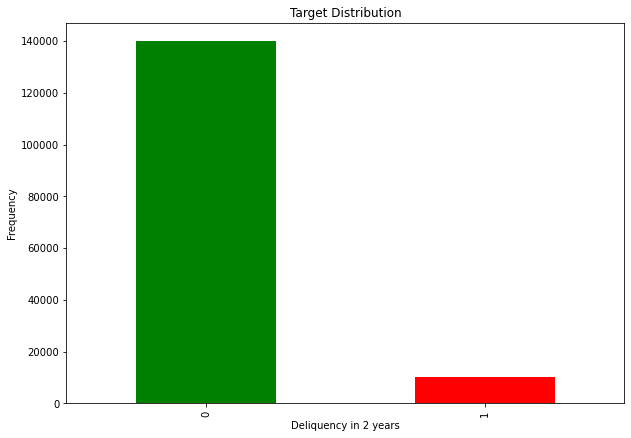

In [20]:
plt.figure(figsize=(10,7))
df_train.SeriousDlqin2yrs.value_counts().plot(kind = 'bar',color = ['green','red'])
plt.title('Target Distribution')
plt.xlabel('Deliquency in 2 years')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

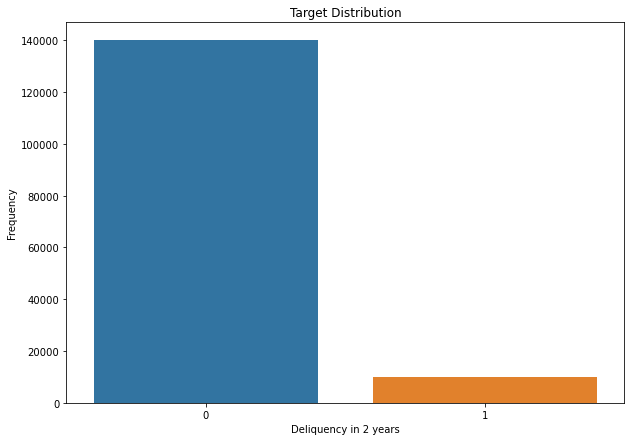

In [22]:
plt.figure(figsize = (10,7))
sns.countplot(x=df_train.SeriousDlqin2yrs)
plt.title('Target Distribution')
plt.xlabel('Deliquency in 2 years')
plt.ylabel('Frequency')

Accuracy score: ~93%
Precesion: 
Recall: 
F1-Score:
basing on that which will show howmany %  also the harmony mean 
AUC and Gini (bank)

In [23]:
df_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


**Q9: Correlation of features and target**

<AxesSubplot:>

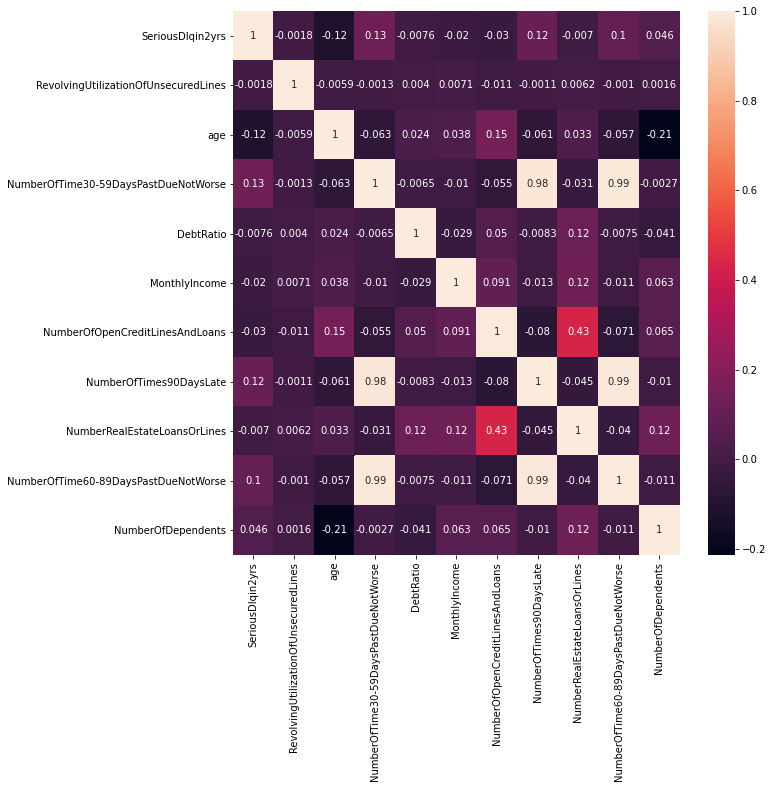

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(),annot = True) # tận dụng heatmap to show vizulization

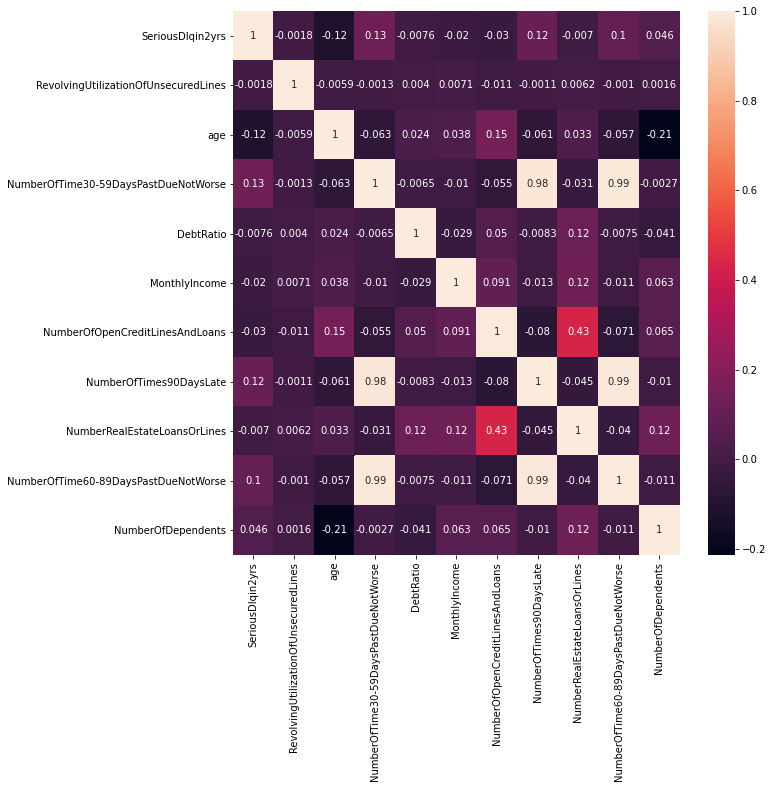

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(),annot = True);

**Q10: Describe features distribution and correlation given histogram and pairplot chart**

array([[<AxesSubplot:title={'center':'SeriousDlqin2yrs'}>,
        <AxesSubplot:title={'center':'RevolvingUtilizationOfUnsecuredLines'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'NumberOfTime30-59DaysPastDueNotWorse'}>,
        <AxesSubplot:title={'center':'DebtRatio'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>],
       [<AxesSubplot:title={'center':'NumberOfOpenCreditLinesAndLoans'}>,
        <AxesSubplot:title={'center':'NumberOfTimes90DaysLate'}>,
        <AxesSubplot:title={'center':'NumberRealEstateLoansOrLines'}>],
       [<AxesSubplot:title={'center':'NumberOfTime60-89DaysPastDueNotWorse'}>,
        <AxesSubplot:title={'center':'NumberOfDependents'}>,
        <AxesSubplot:>]], dtype=object)

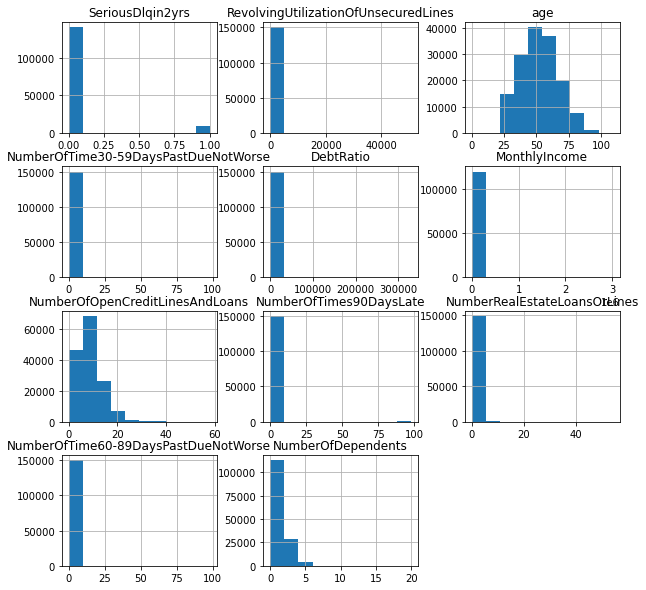

In [27]:
df_train.hist(figsize=(10,10))

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [ ]:
sns.pairplot(data = df_train);

In [30]:
df_train.columns #to take the name of all columns 

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [105]:
#sns.displot(df_train['RevolvingUtilizationOfUnsecuredLines'])

**Q11: Explore each feature with target**

## 3. MODEL

**Q12: Handle outliers in dataset**

Misssing Value and Outliner 

Inter Quantile Range (normale distribution)

![](https://mathbitsnotebook.com/Algebra2/Statistics/normalstandard.jpg)

We will collect the data from Q1 to Q3 IQR 

Q1-1.5IQR-Q3+1.5IQR

![](https://upload.wikimedia.org/wikipedia/commons/8/89/Boxplot_vs_PDF.png)

1.5 is defaults 2,3 depending on your distribution

In [31]:
from collections import Counter
def detect_ouliers(df,n, features):
    """
    df = dataframe
    feature: lisst containning column names
    """
    outliner_indices = []#indices = index+es
    #iterate over feature(columns)
    for col in features:
        #Step 2: calculate the 1st quntile(25%)
        Q1 = np.percentile(df[col],25)
        #Step 3: Calculate the 3rd quantile(75%)
        Q3 = np.percentile(df[col],75)
        #Step 4: Calculate IQR = Q3-Q1
        IQR = Q3-Q1
        #Step 5: Outlier step <Q1-1.5IQR and >Q3+1.5IQR
        outlier_step = 1.5 *IQR
        #Step 6: Determine the list off indices off outlier for feature
        outlier_list_col = df[(df[col] < Q1- 1.5*IQR)|(df[col] > Q3 + 1.5*IQR)].index
        #Step 7: append them 
        outliner_indices.extend(outlier_list_col)
        #note taht append [1,2,3] and [2,3] -> [1,2,3,[2,3]] however extand will append two list [1,2,3,2,3]
    #Select rows containning morre than outliers
    outlier_indices = Counter(outliner_indices)
    multiple_outliers = list(k for k,v in outlier_indices.items() if v>n)#(comprehesion)take key give value larger than n 
    return multiple_outliers 


In [32]:
from collections import Counter
a = [1,3,4,3,4]

In [33]:
Counter(a)

Counter({1: 1, 3: 2, 4: 2})

In [34]:
df_train.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [36]:
features = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']

In [37]:
outlier_to_drop = detect_ouliers(df_train,3,features)

In [41]:
len(df_train),len(outlier_to_drop)

(150000, 520)

In [52]:
len(outlier_to_drop)

520

In [54]:
df=df_train.drop(outlier_to_drop,axis = 0) #drop hàng axis=1 drop cột

That is the Feature Engineering task 
(Remove the outliner)

**Q13: Merge train and test dataset**

In [62]:
pd.concat([df_train,df_test],axis =0) #train test is the same all until now
#Nối row với nhau axis =0

,Target,UnsecLines,age,Late3059,DebtRatio,MonthlyIncome,OpenCredit,Late90,PropLines,Late60-89,Deps
0,1.0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
101498,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


**Q14: Rename columns name into shorter alias**

In [63]:
dataset = pd.concat([df_train,df_test],axis =0)

In [64]:
dataset.head()

,Target,UnsecLines,age,Late3059,DebtRatio,MonthlyIncome,OpenCredit,Late90,PropLines,Late60-89,Deps
0,1.0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [65]:
dataset = dataset.rename(columns={'SeriousDlqin2yrs':'Target',
                        'RevolvingUtilizationOfUnsecuredLines':'UnsecLines',
                        'NumberOfTime30-59DaysPastDueNotWorse':'Late3059',
                        'NumberOfOpenCreditLinesAndLoans':'OpenCredit',
                        'NumberOfTimes90DaysLate': 'Late90',
                        'NumberRealEstateLoansOrLines': 'PropLines',
                        'NumberOfTime60-89DaysPastDueNotWorse':'Late60-89',
                        'NumberOfDependents':'Deps'
                       })
#syntax: dataset.rename(columns{key:value}) key is old name and value is new name
df_train = df_train.rename(columns={'SeriousDlqin2yrs':'Target',
                        'RevolvingUtilizationOfUnsecuredLines':'UnsecLines',
                        'NumberOfTime30-59DaysPastDueNotWorse':'Late3059',
                        'NumberOfOpenCreditLinesAndLoans':'OpenCredit',
                        'NumberOfTimes90DaysLate': 'Late90',
                        'NumberRealEstateLoansOrLines': 'PropLines',
                        'NumberOfTime60-89DaysPastDueNotWorse':'Late60-89',
                        'NumberOfDependents':'Deps'
                       })

df_test = df_test.rename(columns={'SeriousDlqin2yrs':'Target',
                        'RevolvingUtilizationOfUnsecuredLines':'UnsecLines',
                        'NumberOfTime30-59DaysPastDueNotWorse':'Late3059',
                        'NumberOfOpenCreditLinesAndLoans':'OpenCredit',
                        'NumberOfTimes90DaysLate': 'Late90',
                        'NumberRealEstateLoansOrLines': 'PropLines',
                        'NumberOfTime60-89DaysPastDueNotWorse':'Late60-89',
                        'NumberOfDependents':'Deps'
                       })

In [58]:
df_train.head()

,Target,UnsecLines,age,Late3059,DebtRatio,MonthlyIncome,OpenCredit,Late90,PropLines,Late60-89,Deps
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


**Q15: Building binary/dummy variables**
**Hints**: Quantile data first

||Space between 2 bins|frequency|
|-|-|-|
|'cut'|equal|different|
|'qcut'|same|same|

In [70]:
pd.DataFrame(pd.qcut(dataset.UnsecLines,5)).value_counts()

UnsecLines      
(-0.001, 0.0192]    50301
(0.083, 0.271]      50301
(0.702, 50708.0]    50301
(0.0192, 0.083]     50300
(0.271, 0.702]      50300
dtype: int64

In [66]:
pd.DataFrame(pd.qcut(dataset.UnsecLines,5)).value_counts()
#dataset.UnsecLines cột muốn chia 
#q=5 số lượng beam mà muốn chia ra

UnsecLines      
(-0.001, 0.0192]    50301
(0.083, 0.271]      50301
(0.702, 50708.0]    50301
(0.0192, 0.083]     50300
(0.271, 0.702]      50300
dtype: int64

In [73]:
(pd.qcut(dataset.UnsecLines.values,5)).codes # return 0,4

array([4, 4, 3, ..., 1, 3, 3], dtype=int8)

In [74]:
dataset.UnsecLines = pd.qcut(dataset.UnsecLines.values,5).codes

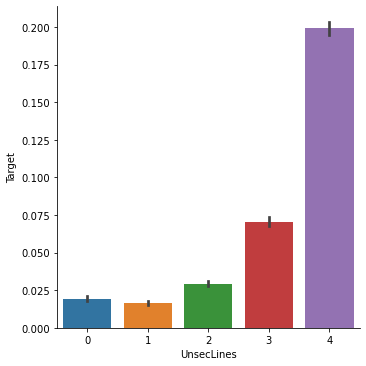

In [76]:
sns.catplot(data = dataset,x='UnsecLines',y= 'Target',kind = 'bar') #category is cat

The trend increase imedidately (exponetial)
Vao cum 4: Ti le no xau cao 
standard validation = dark[small]color 

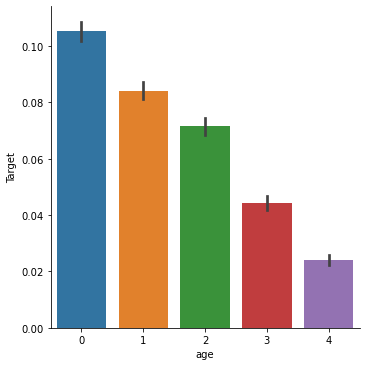

In [142]:
dataset.age = pd.qcut(dataset.age.values,5).codes
sns.catplot(data = dataset,x='age',y= 'Target',kind = 'bar')

In [77]:
dataset.Late3059 = pd.qcut(dataset.Late3059.values,5).codes
sns.catplot(data = dataset,x='Late3059',y= 'Target',kind = 'bar')

ValueError: Bin edges must be unique: array([ 0.,  0.,  0.,  0.,  0., 98.]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [78]:
dataset.columns

Index(['Target', 'UnsecLines', 'age', 'Late3059', 'DebtRatio', 'MonthlyIncome',
       'OpenCredit', 'Late90', 'PropLines', 'Late60-89', 'Deps'],
      dtype='object')

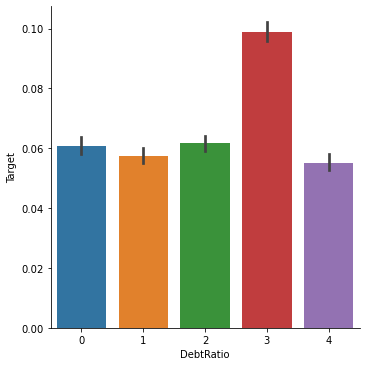

In [79]:
dataset.DebtRatio = pd.qcut(dataset.DebtRatio.values,5).codes
sns.catplot(data = dataset,x='DebtRatio',y= 'Target',kind = 'bar')

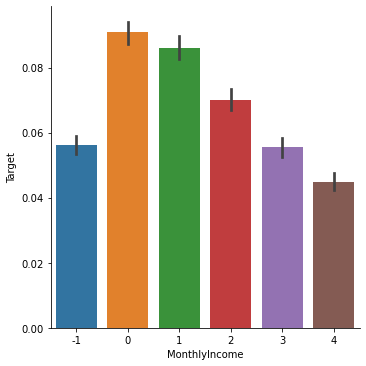

In [80]:
dataset.MonthlyIncome = pd.qcut(dataset.MonthlyIncome.values,5).codes
sns.catplot(data = dataset,x='MonthlyIncome',y= 'Target',kind = 'bar')

In [81]:
dataset  = pd.concat([df_train,df_test],axis =0)

In [82]:
dataset.MonthlyIncome.isnull().sum(), dataset.MonthlyIncome.median()

(49834, 5400.0)

In [83]:
dataset.MonthlyIncome =  dataset.MonthlyIncome.fillna(dataset.MonthlyIncome.median())

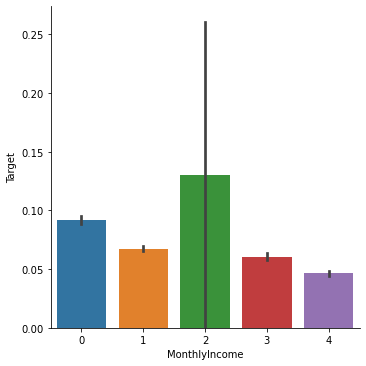

In [84]:
dataset.MonthlyIncome = pd.qcut(dataset.MonthlyIncome.values,5).codes
sns.catplot(data = dataset,x='MonthlyIncome',y= 'Target',kind = 'bar')

In [85]:
dataset.columns

Index(['Target', 'UnsecLines', 'age', 'Late3059', 'DebtRatio', 'MonthlyIncome',
       'OpenCredit', 'Late90', 'PropLines', 'Late60-89', 'Deps'],
      dtype='object')

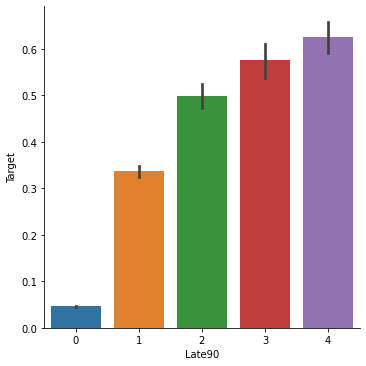

In [86]:
dataset.Late90 = [4 if x>=4 else x for x in dataset.Late90]
sns.catplot(data = dataset,x='Late90',y= 'Target',kind = 'bar')

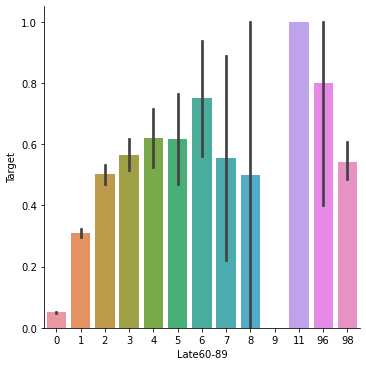

In [87]:
sns.catplot(data = dataset,x='Late60-89',y= 'Target',kind = 'bar')

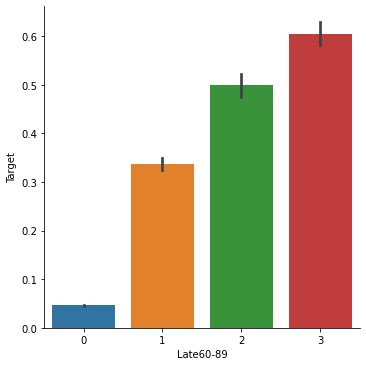

In [88]:
dataset['Late60-89'] = [3 if x>= 3 else x for x in dataset.Late90]
sns.catplot(data = dataset,x='Late60-89',y= 'Target',kind = 'bar')

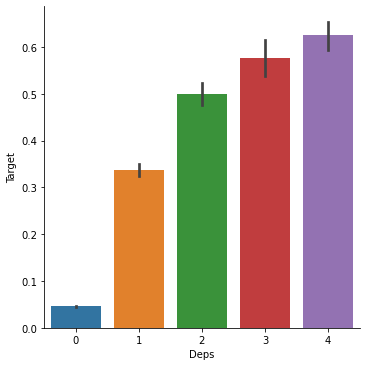

In [89]:
dataset.Deps = dataset.Deps.fillna(dataset.Deps.median())
dataset['Deps'] = [4 if x>= 4 else x for x in dataset.Late90]
sns.catplot(data = dataset,x='Deps',y= 'Target',kind = 'bar')

In [90]:
len(dataset.columns)

11

In [91]:
dataset.columns

Index(['Target', 'UnsecLines', 'age', 'Late3059', 'DebtRatio', 'MonthlyIncome',
       'OpenCredit', 'Late90', 'PropLines', 'Late60-89', 'Deps'],
      dtype='object')

In [ ]:
column_names = ['Target', 'UnsecLines', 'age', 'Late3059', 'DebtRatio', 'MonthlyIncome',
       'OpenCredit', 'Late90', 'PropLines', 'Late60-89', 'Deps']
for col in column_names:
    dataset = pd.get_dummies(dataset,columns = [col],prefix=col)

In [ ]:
dataset.columns

**Q16: Train test split**

In [7]:
df_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [99]:
train = dataset[:len(df_train)]
test = dataset[len(df_train):]
train
test

,Target,UnsecLines,age,Late3059,DebtRatio,MonthlyIncome,OpenCredit,Late90,PropLines,Late60-89,Deps
0,NaN,0.885519,43,0,0.177513,3,4,0,0,0,0
1,NaN,0.463295,57,0,0.527237,4,15,0,4,0,0
2,NaN,0.043275,59,0,0.687648,1,12,0,1,0,0
3,NaN,0.280308,38,1,0.925961,0,7,0,2,0,0
4,NaN,1.000000,27,0,0.019917,1,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
101498,NaN,0.282653,24,0,0.068522,0,5,0,0,0,0
101499,NaN,0.922156,36,3,0.934217,3,8,0,2,0,0
101500,NaN,0.081596,70,0,836.000000,1,3,0,0,0,0
101501,NaN,0.335457,56,0,3568.000000,1,8,0,2,0,0


**Q17: Train prediction model using Random Forest Classifier**

In [114]:
train['Target'] = train['Target'].astype(int)#casting using castype
X_train = train.drop(labels =['Target'], axis =1)#loại bỏ cột target
X_test = test.drop(labels =['Target'], axis =1)#loại bỏ cột Target
Y_train = train.Target
Y_test = test.Target

/opt/anaconda3/envs/anthony/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [116]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators =50, max_features = 'sqrt')#CREAT MODEL
clf.fit(X_train,Y_train)#PUSH XTRAIN AND TRAIN

RandomForestClassifier(max_features='sqrt', n_estimators=50)

In [120]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

**Q18: Get feature importance from classifier**

In [121]:
#Show the the importanal features

In [133]:
features = pd. DataFrame()
features['names'] = X_train.columns
features['importance'] = clf.feature_importances_
features = features.sort_values(by=['importance'], ascending = False)
features

,names,importance
3,DebtRatio,0.249794
0,UnsecLines,0.242800
1,age,0.159542
5,OpenCredit,0.106474
2,Late3059,0.052596
9,Deps,0.046506
6,Late90,0.042719
7,PropLines,0.036528
4,MonthlyIncome,0.035711
8,Late60-89,0.027331


<AxesSubplot:>

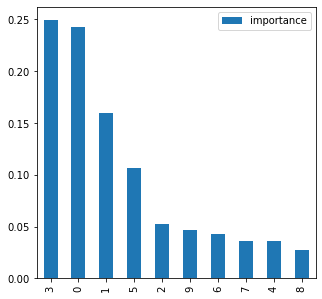

In [134]:
features.plot(kind = 'bar',figsize = (5,5))

**Q19: Retrain with better parameters**

Parameter +chanhe combination of feature (cat thu xem ntn roi dua ra)

**Q20: Predict and evaluate the model performance**

Đôi khi trả về xác xuất % bao nhiêu nợ xấu tốt ntn 

In [135]:
y_pred = clf.predict_proba(X_test)[:,1] #Threshold We have to show it actually to show what we have with this result
y_pred

array([0.02, 0.06, 0.02, ..., 0.  , 0.  , 0.02])

Đánh gía threadhold dựa trên: bad rate(deafault)+population rejection (phải giữ khách hàng tiềm năng)

Phải đánh giá được threshold tốt hay xấu

<center> <img src="https://media.makeameme.org/created/have-a-nice-17d2442086.jpg" width="500"/> </center>